<p><font size="6"><b>07 - Pandas: Reshaping data</b></font></p>

> *DS Data manipulation, analysis and visualisation in Python*  
> *December, 2017*

> *© 2016, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pivoting data

## Cfr. excel

People who know Excel, probably know the **Pivot** functionality:

![](../img/pivot_excel.png)

The data of the table:

In [2]:
excelample = pd.DataFrame({'Month': ["January", "January", "January", "January", 
                                  "February", "February", "February", "February", 
                                  "March", "March", "March", "March"],
                   'Category': ["Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment"],
                   'Amount': [74., 235., 175., 100., 115., 240., 225., 125., 90., 260., 200., 120.]})

In [3]:
excelample

,Amount,Category,Month
0,74.0,Transportation,January
1,235.0,Grocery,January
2,175.0,Household,January
3,100.0,Entertainment,January
4,115.0,Transportation,February
5,240.0,Grocery,February
6,225.0,Household,February
7,125.0,Entertainment,February
8,90.0,Transportation,March
9,260.0,Grocery,March


In [4]:
excelample_pivot = excelample.pivot(index="Category", columns="Month", values="Amount")
excelample_pivot

Month,February,January,March
Category,,,
Entertainment,125.0,100.0,120.0
Grocery,240.0,235.0,260.0
Household,225.0,175.0,200.0
Transportation,115.0,74.0,90.0


Interested in *Grand totals*?

In [5]:
# sum columns
excelample_pivot.sum(axis=1)

Category
Entertainment     345.0
Grocery           735.0
Household         600.0
Transportation    279.0
dtype: float64

In [6]:
# sum rows
excelample_pivot.sum(axis=0)

Month
February    705.0
January     584.0
March       670.0
dtype: float64

## Pivot is just reordering your data:

Small subsample of the titanic dataset:

In [7]:
df = pd.DataFrame({'Fare': [7.25, 71.2833, 51.8625, 30.0708, 7.8542, 13.0],
                   'Pclass': [3, 1, 1, 2, 3, 2],
                   'Sex': ['male', 'female', 'male', 'female', 'female', 'male'],
                   'Survived': [0, 1, 0, 1, 0, 1]})

In [8]:
df

,Fare,Pclass,Sex,Survived
0,7.2500,3,male,0
1,71.2833,1,female,1
2,51.8625,1,male,0
3,30.0708,2,female,1
4,7.8542,3,female,0
5,13.0000,2,male,1


In [9]:
df.pivot(index='Pclass', columns='Sex', values='Fare')

Sex,female,male
Pclass,,
1,71.2833,51.8625
2,30.0708,13.0000
3,7.8542,7.2500


In [10]:
df.pivot(index='Pclass', columns='Sex', values='Survived')

Sex,female,male
Pclass,,
1,1,0
2,1,1
3,0,0


So far, so good...

Let's now use the full titanic dataset:

In [11]:
df = pd.read_csv("../data/titanic.csv")

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


And try the same pivot (*no worries about the try-except, this is here just used to catch a loooong error*):

In [13]:
try:
    df.pivot(index='Sex', columns='Pclass', values='Fare')
except Exception as e:
    print("Exception!", e)

Exception! Index contains duplicate entries, cannot reshape


This does not work, because we would end up with multiple values for one cell of the resulting frame, as the error says: `duplicated` values for the columns in the selection. As an example, consider the following rows of our three columns of interest:

In [14]:
df.loc[[1, 3], ["Sex", 'Pclass', 'Fare']]

,Sex,Pclass,Fare
1,female,1,71.2833
3,female,1,53.1000


Since `pivot` is just restructering data, where would both values of `Fare` for the same combination of `Sex` and `Pclass` need to go?

Well, they need to be combined, according to an `aggregation` functionality, which is supported by the function`pivot_table`

<div class="alert alert-danger">

<b>NOTE</b>:

 <ul>
  <li>**Pivot** is purely restructering: a single value for each index/column combination is required.</li>
</ul>
</div>

# Pivot tables - aggregating while pivoting

In [15]:
df = pd.read_csv("../data/titanic.csv")

In [16]:
df.pivot_table(index='Sex', columns='Pclass', values='Fare')

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li>By default, `pivot_table` takes the **mean** of all values that would end up into one cell. However, you can also specify other aggregation functions using the `aggfunc` keyword.</li>
</ul>
</div>

In [17]:
df.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='max')

Pclass,1,2,3
Sex,,,
female,512.3292,65.0,69.55
male,512.3292,73.5,69.55


In [18]:
df.pivot_table(index='Sex', columns='Pclass', 
               values='Fare', aggfunc='count')

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li>There is a shortcut function for a `pivot_table` with a `aggfunc=count` as aggregation: `crosstab`</li>
</ul>
</div>

In [19]:
pd.crosstab(index=df['Sex'], columns=df['Pclass'])

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a pivot table with the survival rates for Pclass vs Sex.</li>
</ul>
</div>

In [20]:
df.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


Text(0,0.5,'Survival ratio')

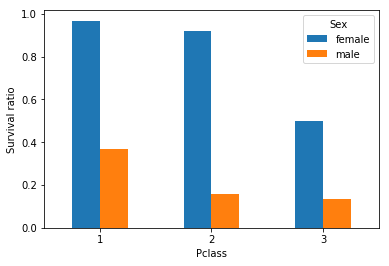

In [21]:
fig, ax1 = plt.subplots()
df.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean').plot(kind='bar', 
                                                       rot=0, 
                                                       ax=ax1)
ax1.set_ylabel('Survival ratio')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Make a table of the median Fare payed by aged/underaged vs Sex.</li>
</ul>
</div>

In [22]:
df['Underaged'] = df['Age'] <= 18

In [23]:
df.pivot_table(index='Underaged', columns='Sex', 
               values='Fare', aggfunc='mean')

Sex,female,male
Underaged,,
False,46.612196,25.118081
True,36.765626,28.416023


# Melt - from pivot table to long or tidy format

The `melt` function performs the inverse operation of a `pivot`. This can be used to make your frame longer, i.e. to make a *tidy* version of your data.

In [24]:
pivoted = df.pivot_table(index='Sex', columns='Pclass', values='Fare').reset_index()
pivoted.columns.name = None

In [25]:
pivoted

,Sex,1,2,3
0,female,106.125798,21.970121,16.118810
1,male,67.226127,19.741782,12.661633


Assume we have a DataFrame like the above. The observations (the average Fare people payed) are spread over different columns. In a tidy dataset, each observation is stored in one row. To obtain this, we can use the `melt` function:

In [26]:
pd.melt(pivoted)

,variable,value
0,Sex,female
1,Sex,male
2,1,106.126
3,1,67.2261
4,2,21.9701
5,2,19.7418
6,3,16.1188
7,3,12.6616


As you can see above, the `melt` function puts all column labels in one column, and all values in a second column.

In this case, this is not fully what we want. We would like to keep the 'Sex' column separately:

In [27]:
pd.melt(pivoted, id_vars=['Sex']) #, var_name='Pclass', value_name='Fare')

,Sex,variable,value
0,female,1,106.125798
1,male,1,67.226127
2,female,2,21.970121
3,male,2,19.741782
4,female,3,16.118810
5,male,3,12.661633


# Reshaping with `stack` and `unstack`

The docs say:

> Pivot a level of the (possibly hierarchical) column labels, returning a
DataFrame (or Series in the case of an object with a single level of
column labels) having a hierarchical index with a new inner-most level
of row labels.

Indeed... 
<img src="../img/schema-stack.svg" width=50%>

Before we speak about `hierarchical index`, first check it in practice on the following dummy example:

In [28]:
df = pd.DataFrame({'A':['one', 'one', 'two', 'two'], 
                   'B':['a', 'b', 'a', 'b'], 
                   'C':range(4)})
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


To use `stack`/`unstack`, we need the values we want to shift from rows to columns or the other way around as the index:

In [29]:
df = df.set_index(['A', 'B']) # Indeed, you can combine two indices
df

C
A   B   
one a  0
    b  1
two a  2
    b  3

In [30]:
result = df['C'].unstack()
result

B,a,b
A,,
one,0,1
two,2,3


In [31]:
df = result.stack().reset_index(name='C')
df

,A,B,C
0,one,a,0
1,one,b,1
2,two,a,2
3,two,b,3


<div class="alert alert-info">

<b>REMEMBER</b>:

 <ul>
  <li>**stack**: make your data *longer* and *smaller* </li>
  <li>**unstack**: make your data *shorter* and *wider* </li>
</ul>
</div>

## Mimick pivot table 

To better understand and reason about pivot tables, we can express this method as a combination of more basic steps. In short, the pivot is a convenient way of expressing the combination of a `groupby` and `stack/unstack`.

In [32]:
df = pd.read_csv("../data/titanic.csv")

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df.pivot_table(index='Pclass', columns='Sex', 
               values='Survived', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Get the same result as above based on a combination of `groupby` and `unstack`</li>
  <li>First use `groupby` to calculate the survival ratio for all groups`unstack`</li>
  <li>Then, use `unstack` to reshape the output of the groupby operation</li>
</ul>
</div>

In [35]:
df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


# [OPTIONAL] Exercises: use the reshaping methods with the movie data

These exercises are based on the [PyCon tutorial of Brandon Rhodes](https://github.com/brandon-rhodes/pycon-pandas-tutorial/) (so credit to him!) and the datasets he prepared for that. You can download these data from here: [`titles.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKajNMa1pfSzN6Q3M) and [`cast.csv`](https://drive.google.com/open?id=0B3G70MlBnCgKal9UYTJSR2ZhSW8) and put them in the `/data` folder.

In [36]:
cast = pd.read_csv('../data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


In [ ]:
titles = pd.read_csv('../data/titles.csv')
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Plot the number of actor roles each year and the number of actress roles each year over the whole period of available movie data.</li>
</ul>
</div>

In [ ]:
grouped = cast.groupby(['year', 'type']).size()
table = grouped.unstack('type')
table.plot()

In [ ]:
cast.pivot_table(index='year', columns='type', values="character", aggfunc='count').plot() 
# for values in using the , take a column with no Nan values in order to count effectively all values -> at this stage: aha-erlebnis about crosstab function(!)

In [ ]:
pd.crosstab(index=cast['year'], columns=cast['type']).plot()

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Plot the number of actor roles each year and the number of actress roles each year. Use kind='area' as plot type</li>
</ul>
</div>

In [ ]:
pd.crosstab(index=cast['year'], columns=cast['type']).plot(kind='area')

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Plot the fraction of roles that have been 'actor' roles each year over the whole period of available movie data.</li>
</ul>
</div>

In [ ]:
grouped = cast.groupby(['year', 'type']).size()
table = grouped.unstack('type')
(table['actor'] / (table['actor'] + table['actress'])).plot(ylim=[0,1])

<div class="alert alert-success">

<b>EXERCISE</b>:

 <ul>
  <li>Define a year as a "Superman year" when films of that year feature more Superman characters than Batman characters. How many years in film history have been Superman years?</li>
</ul>
</div>

In [ ]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

In [ ]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))